![speed-dating](https://www.lespeeddating.com/img/cms/soiree_speed-dating-images.jpg)

#  <span style="color:pink"><center>Speed dating</center></span> 

In [1]:
# import des differentes librairies
!pip install plotly -q
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
from sklearn import metrics

In [2]:
data=pd.read_csv ('Speed_dating_data.csv', encoding="ISO-8859-1")

In [3]:
#data.describe(include='all')
data.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [4]:
data.shape # 8378 lignes et 195 colonnes

(8378, 195)

In [5]:
#Laissez tomber les indices manquants.
data.isnull().sum()

iid            0
id             1
gender         0
idg            0
condtn         0
            ... 
attr5_3     6362
sinc5_3     6362
intel5_3    6362
fun5_3      6362
amb5_3      6362
Length: 195, dtype: int64

Nous pouvons constaster qu'il y a 8 378 lignes et de nombreuses colonnes comportent des NaN.
Lors de cette analyse, il faut être vigilant sur les imputations car elles pourraient modifier 
les données des graphiques.

In [6]:
#on remplace le nom des colonnes afin d'avoir une meilleur lisibiliter
#sur les données de chaque colonnes

data.rename(columns={"gender": "Genre", 
                     "age_o":"age partenaire",
                     "race_o":"race partenaire",
                     "dec_o":"decision partenaire",
                     "imprace":"importance de la race",
                     "imprelig":"importance de la religion",
                     "from":"origine",
                     "date":"fréquence des rendez-vous"}, inplace=True)

#Crée un dictionnaire avec des clés et des valeurs on écrasera ensuite les clé du dataset
# pour les remplacer par des valeurs

gender_changement = { 0 : 'Femme',1 : 'Homme'}

decision_changement={1:"Oui",0:"Non"}

samerace_changement={1:"Oui",0:"Non"}

race_changement = {1: 'Africain', 2: 'Européen', 3: 'Hispanque', 4: 'Asiatique', 5: 'Americain',6:'Autres'}

field_changement = {1:"Droit",2:"Math",3:"science social",4:"science medical",5:"Ingénieur",6:"Journalisme",
                   7:"Histoire",8:"Econ/Finance",9:"Education",10:"Science biologique",11:"Social",12:"indécis",
                   13:"Science politique",14:"Film",15:"Beaux arts",16:"Langue",17:"Architecture",18:"Autres"}


In [7]:
#on remplace les keys du dataset par des noms que nous avons definie plus haut
data['Genre'].replace(gender_changement, inplace = True)
data["field_cd"].replace(field_changement, inplace = True)
data["decision partenaire"].replace(decision_changement, inplace = True)
data["race partenaire"].replace(race_changement, inplace = True)
data['race'].replace(race_changement, inplace = True)
data['dec'].replace(decision_changement, inplace = True)
data['samerace'].replace(samerace_changement, inplace = True)

In [8]:
data.head()

,iid,id,Genre,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,Femme,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,Femme,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,Femme,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,Femme,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,Femme,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


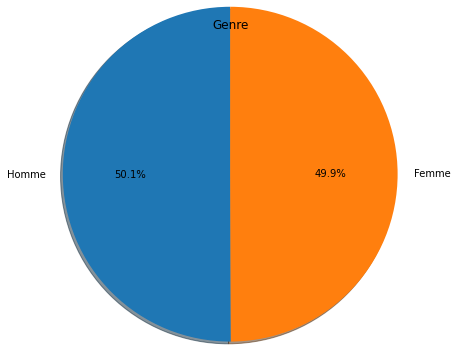

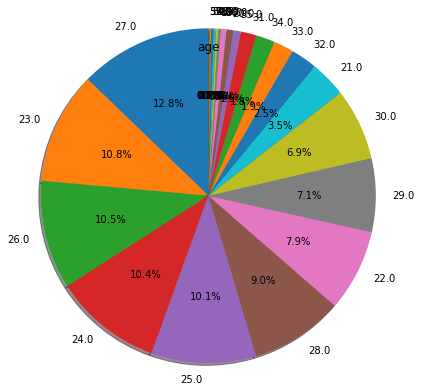

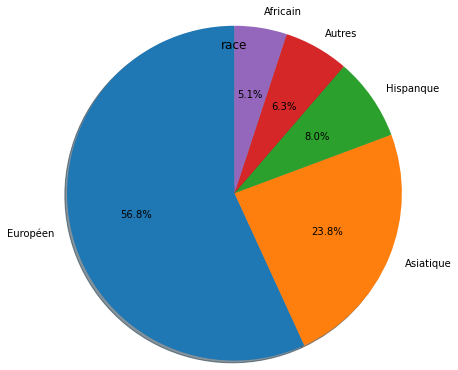

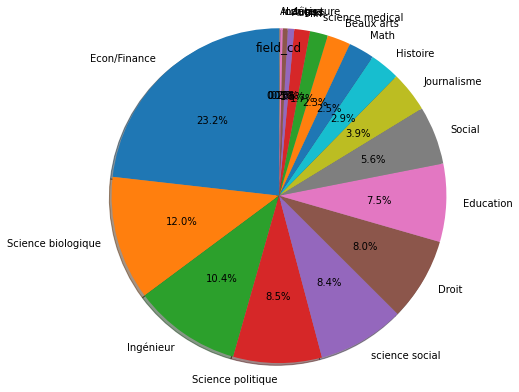

In [9]:
def camembert(cols):  
    data_to_display = data[cols].value_counts()
    myFig = plt.figure(figsize=(5,7))
    myFig.fontsize=1000
    plt.pie(data_to_display.values,
        labels=data_to_display.index,
        autopct='%1.1f%%',
        #colors = [],
        shadow=True,
        startangle=90,
        radius=1.5
       )
    plt.title(cols)
    myFig.show()
    
camembert('Genre')
camembert('age')     
camembert('race')
camembert('field_cd')

Sur les 8376 étudiants on remarque que les hommes et les femmes sont representés de mannière égale.
La tranche d'âge majoritaire est les 23/27 ans avec plus de 10% d'étudiants. 
Cela peut s'expliquer car c'est le parcours classique d'un étudiant qui poursuit sa scolarité.
On remarque que 56% des étudiants sont des européens, 23% sont des asiatiques et pour finir 8% sont des hispaniques.
Les secteurs d'études les plus plébiscités sont économie, la finance,les sciences biologiques et les études d'ingénieur.

Lorsque l'on étudie c'est différentes données nous pouvons donc dire que les européens sont surreprésentés et l'âge varie en fonction du type d'étude et de la durée. 

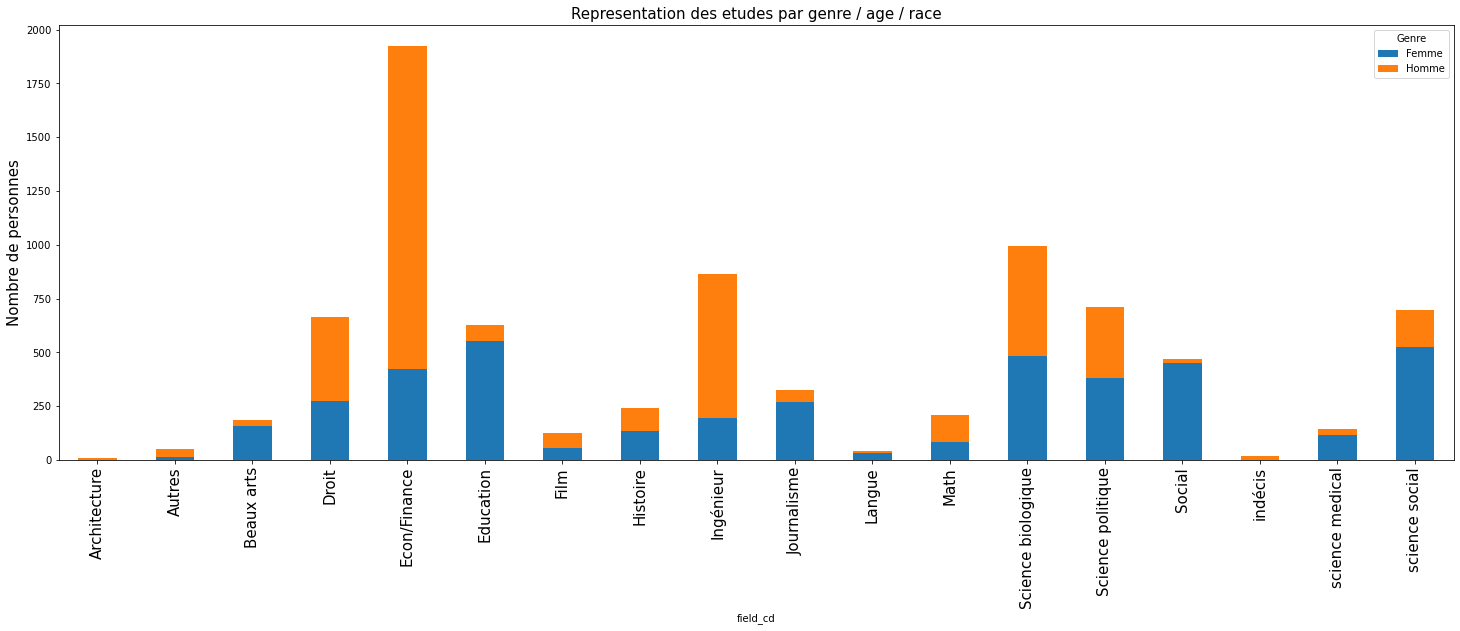

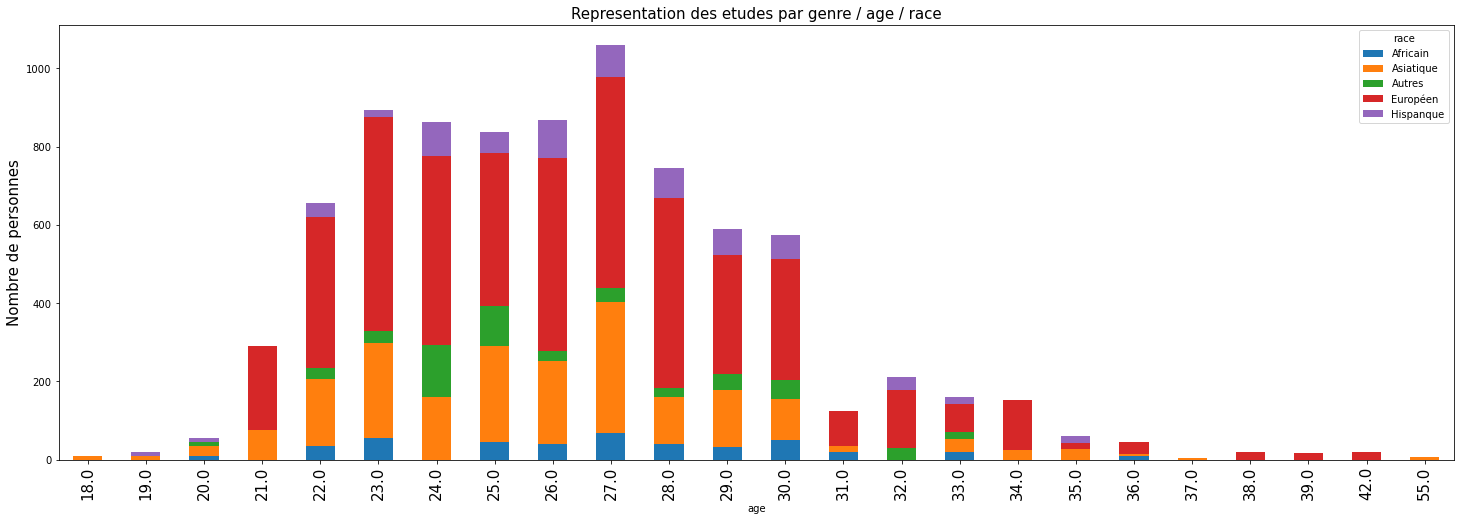

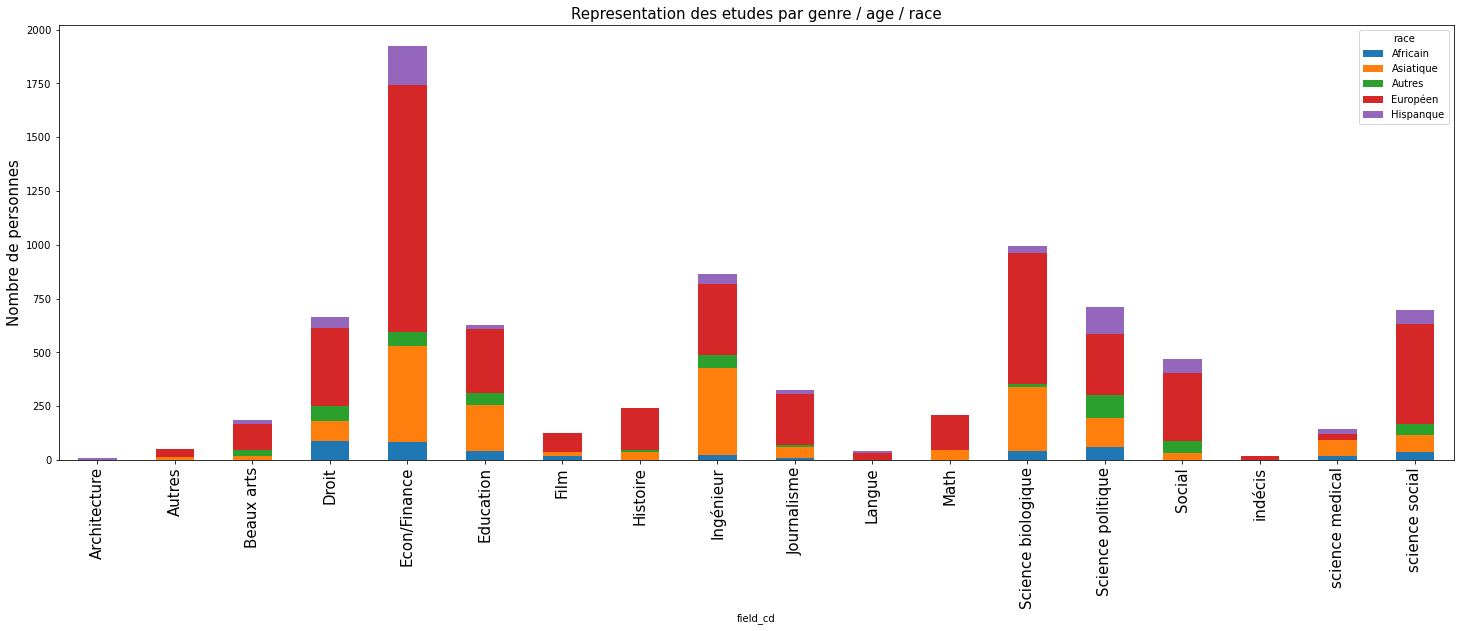

In [10]:
def Barchart(premierarg, secondarg):
    
    mask = data[[premierarg, secondarg]].groupby([premierarg, secondarg]).size().unstack()
    ax = mask.plot(kind='bar', figsize=(25,8), stacked=True)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=15,color = 'black')
    ax.set_title("Representation des etudes par genre / age / race", fontsize=15)
    ax.set_ylabel('Nombre de personnes',fontsize=15)
    plt.show()
    
Barchart('field_cd','Genre')    
#Barchart('age','field_cd')
Barchart('age','race')
Barchart('field_cd','race')

L'ingénierie, la finance et les mathématiques sont majoritairement dominées par les hommes.
Les sciences sociales et médicales, les arts,le journalisme sont davantages dominés par les femmes. 
Les sciences naturelles, les sciences politiques et le cinéma sont représentés de manière très égale par les deux sexes.

Au regard des différents graphiques ci-dessus, on a pu catégorisé la répartition des différentes communautés dans chaque domaine. En plus de ce critère, nous avons pu affiner notre analyse en mettant en avant la répartition des genres, des âges pour avoir un ciblage plus pertinent.

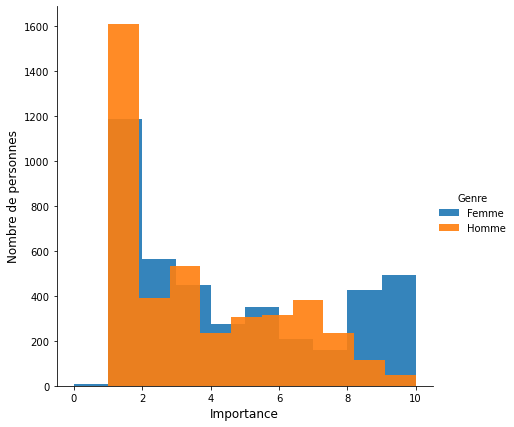

In [11]:
bar = sns.FacetGrid(data, hue='Genre', height = 6)
bar.map(plt.hist, 'importance de la race', alpha= 0.9, bins=10)
bar.set_xlabels('Importance', fontsize=12)
bar.set_titles('L importance de la race par Genre', fontsize=15)
bar.set_ylabels('Nombre de personnes',fontsize=12)
bar.add_legend();

Lors d'un speed-dating les femmes accordent plus d'importance à la communauté de l'autre individu que les hommes

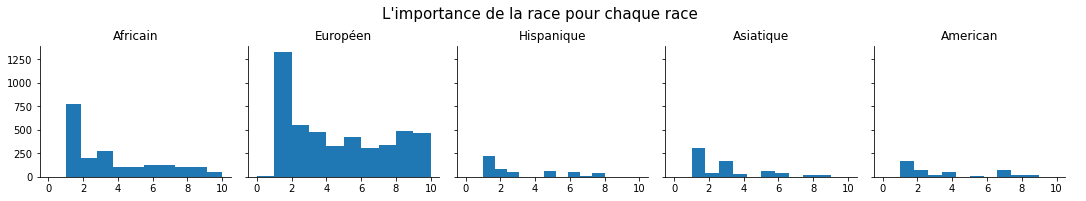

In [12]:
g = sns.FacetGrid(data, col='race')
g.map(plt.hist, 'importance de la race', bins=10)
axes = g.axes.flatten()
axes[0].set_title("Africain")
axes[1].set_title("Européen")
axes[2].set_title("Hispanique")
axes[3].set_title("Asiatique")
axes[4].set_title("American")
g.set_xlabels('', fontsize=1)
plt.subplots_adjust(top=0.8)
g.fig.suptitle("L'importance de la race pour chaque race", fontsize=15)
g.add_legend();

Ce graphique illustre l'intérêt de la communauté du partenaire en fonction de la race. 

Text(0.5, 0, '')

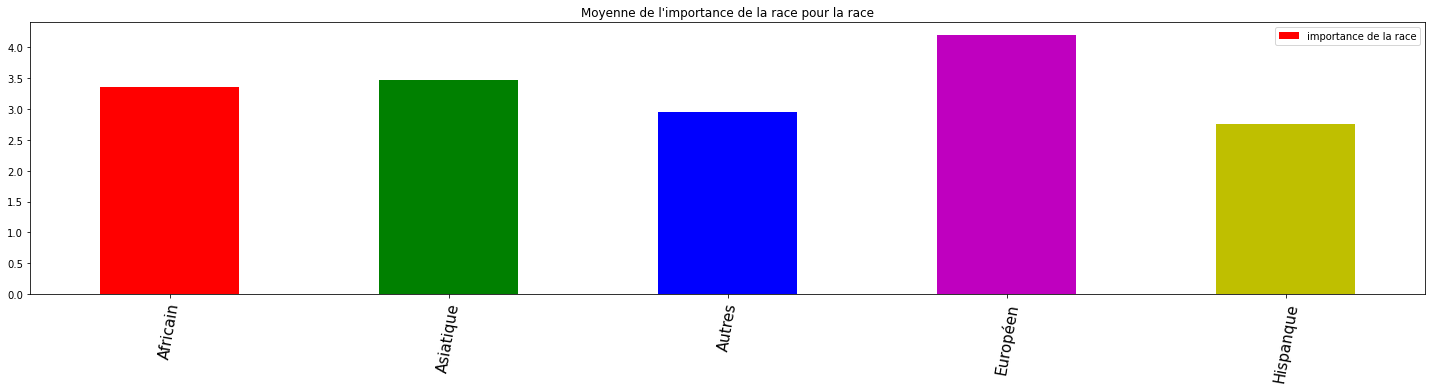

In [17]:
ax = data[['race', 'importance de la race']].groupby('race').mean().plot(kind='bar',
                                                                   figsize=(25,5),
                                                                   title="Moyenne de l'importance de la race pour la race",
                                                                   color='rgbmy')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15, rotation='80')
ax.set_xlabel('',fontsize=15)

In [ ]:
ax = sns.FacetGrid(data, col='race', hue='Genre')
ax.map(plt.hist, 'dec', alpha= 0.7, bins=10)
ax.add_legend()
axes = g.axes.flatten()
axes[0].set_title("Asiatique")
axes[1].set_title("Blanc")
axes[2].set_title("Americain")
axes[3].set_title("Hispanic")
axes[4].set_title("Africain")
plt.subplots_adjust(top=0.8)
ax.fig.suptitle('décisions des races apres rendez-vous', fontsize=15)

ax._legend.set_title('')

Après un rendez-vous, on voit que par communauté, les individus sont plus ou moins favorables à se rencontrer à nouveau.

In [ ]:
data_groupbysame = data[['dec','samerace', 'race','Genre']].groupby(['race','Genre','samerace','dec']).size().unstack()
data_groupbysame

Ces données ont pour intérêt de visualiser en fonction des communautés et du genre des individus présents au speed-dating leur décision de s'orienter vers une personne d'une autre communauté ou non.

# conclusion

Nous avons taché de démontrer à travers plusieurs points d'analyses l’éventualité  pour que deux individus s’accordent un deuxième rendez-vous après la participation d’un speed-dating.
Pour cela, nous avons choisi de nous intéresser particulièrement à l'importance du choix communautaire. 

En effet, grâce à l’analyse nous avons pu apprendre d’avantage sur les caractéristiques des participants en segmentant plusieurs paramètres tels que, le genre, l’âge, le domaine d’étude, l’ethnie.

Les femmes sont plus intra-communautaire lors d 'une rencontre en speed-dating, alors que les hommes sont plus ouverts.

Nous pourrions également approfondir cette étude en s’intéressant à d’autres items comme la réligion, loisirs, catégorie socio-professionnel et les attentes recherchées afin d’obtenir des matchs idéals.